# Explore here

In [1]:
# Your code here
import pandas as pd 

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
for columns in df.columns:
    if df[columns].dtype not in ['int64', 'float64']:
        df[columns] = pd.factorize(df[columns])[0]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


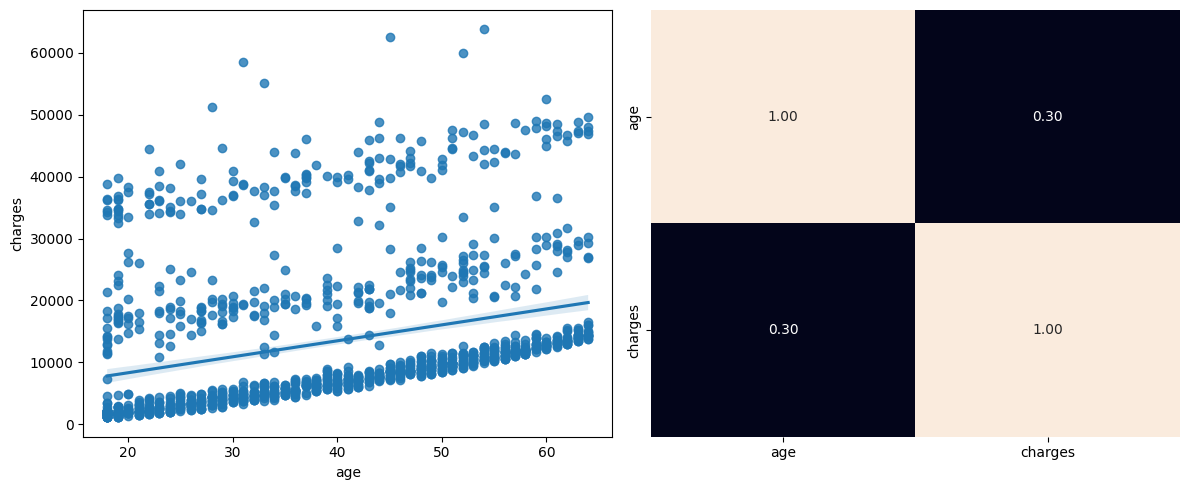

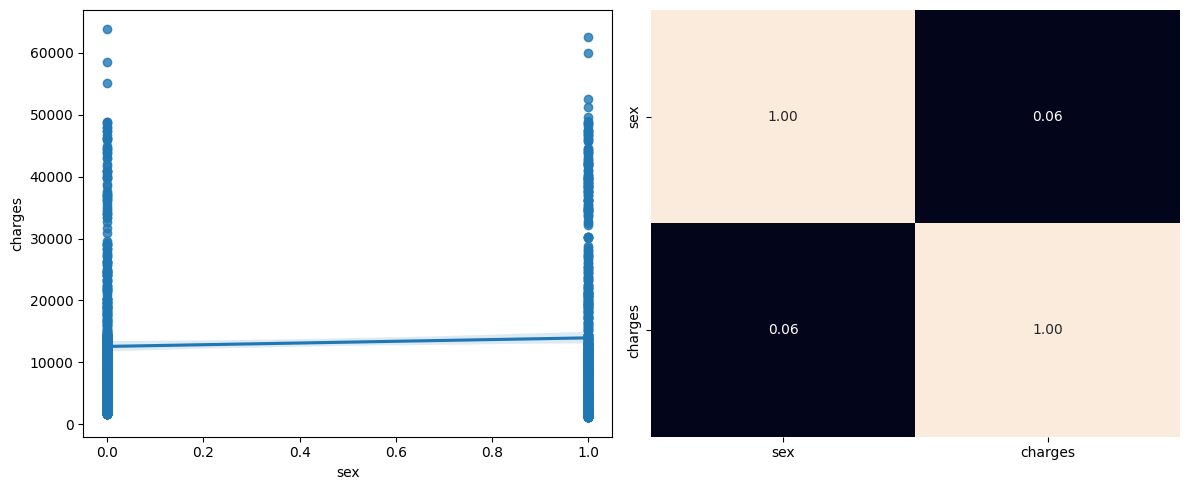

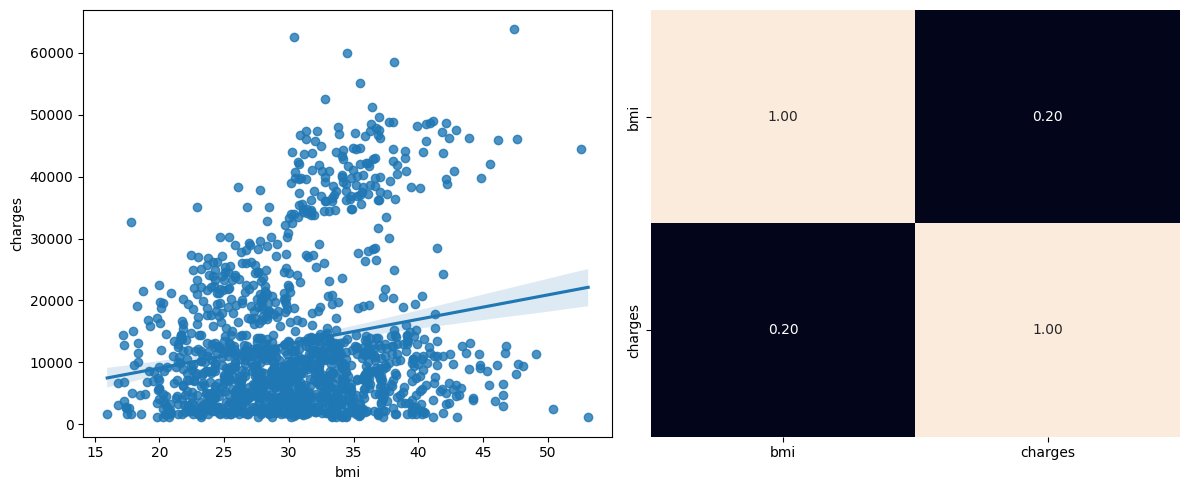

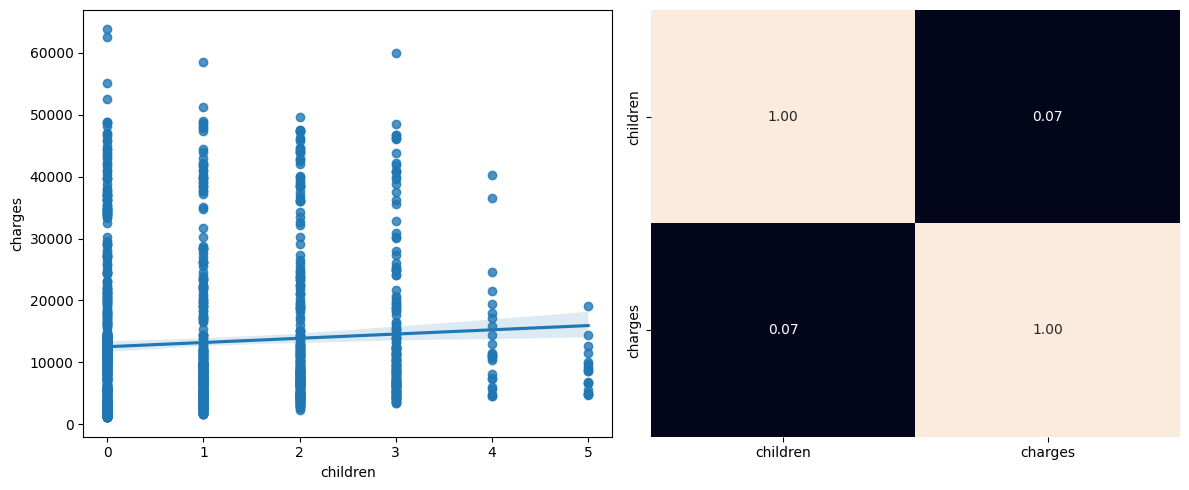

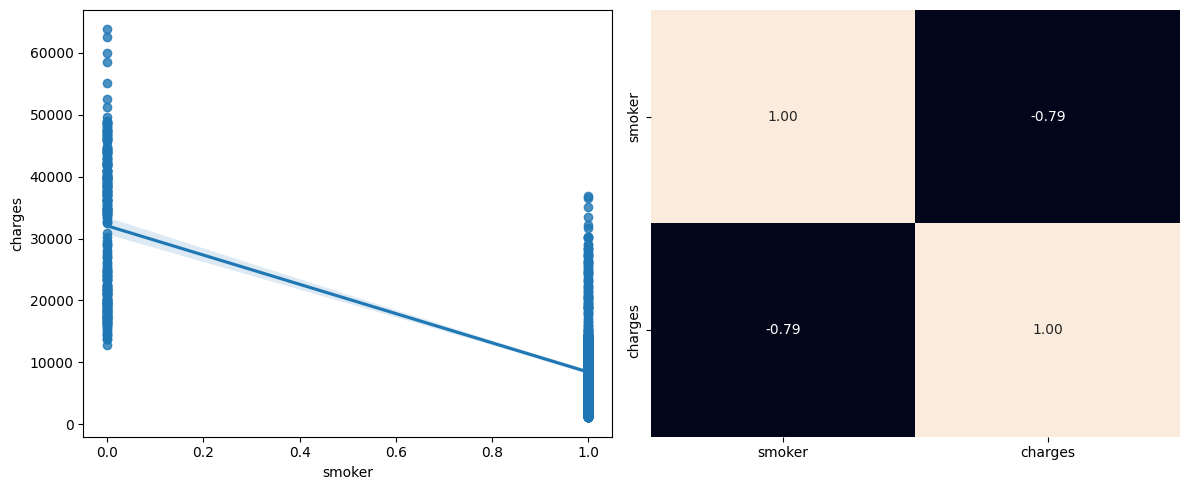

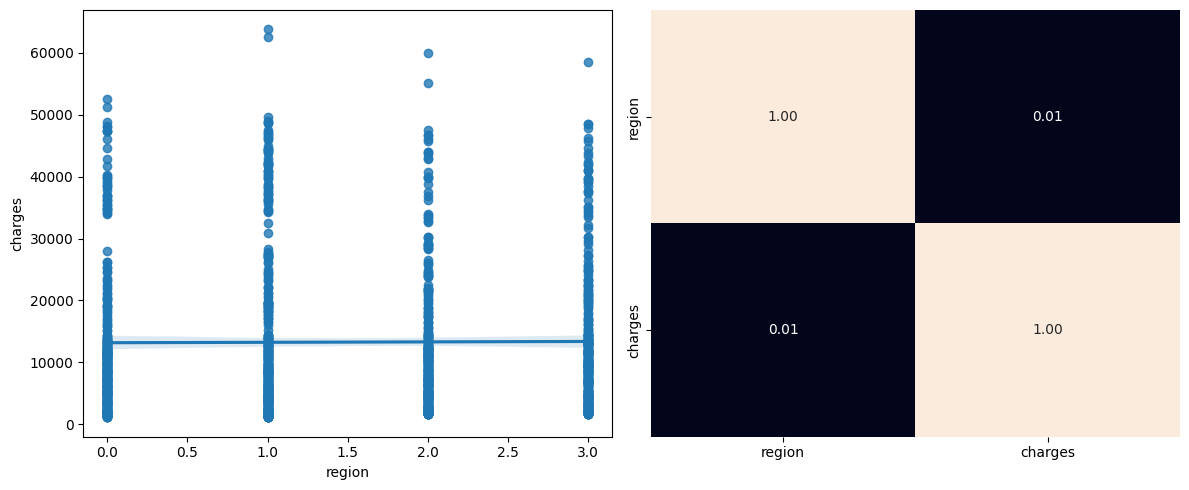

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# charges es columna objetivo

for columns in df.columns:
    if columns != 'charges':
        fig, axis = plt.subplots(1, 2, figsize=(12, 5))
        sns.regplot(x=columns, y='charges', data=df, ax=axis[0])
        sns.heatmap(df[[columns, 'charges']].corr(), annot=True, fmt='.2f', ax=axis[1], cbar=False)
        plt.tight_layout()
        plt.show()


In [36]:
x = df [['smoker','age','bmi']]
y = df['charges']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,smoker,age,bmi
560,1,46,19.95
1285,1,47,24.32
1142,1,52,24.86
969,1,39,34.32
486,1,54,21.47


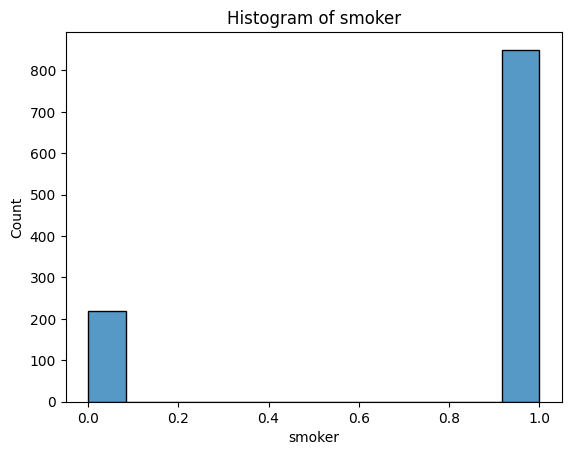

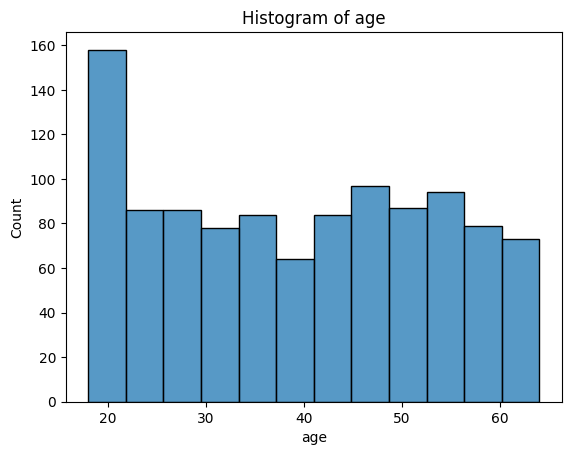

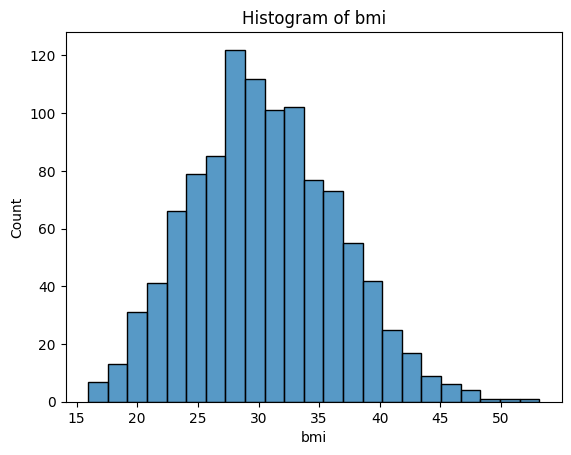

In [38]:
for columns in x_train.columns:
    sns.histplot(x=x_train[columns])
    plt.title(f'Histogram of {columns}')
    plt.show()


In [39]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

scaler = MinMaxScaler()
x_train_esc = scaler.fit_transform(x_train, y_train)
x_test_esc = scaler.transform(x_test)

x_train_esc = pd.DataFrame(x_train_esc, columns=x_train.columns, index=x_train.index)
x_test_esc = pd.DataFrame(x_test_esc, columns=x_test.columns, index=x_test.index)   

x_train_esc.head()

,smoker,age,bmi
560,1.0,0.608696,0.107345
1285,1.0,0.630435,0.224913
1142,1.0,0.739130,0.239440
969,1.0,0.456522,0.493947
486,1.0,0.782609,0.148238


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_esc, y_train)

print(f"Inercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3): {model.coef_}")

Inercepto (a): 21847.09890044787
Coeficientes (b1, b2, b3): [-23675.37184666  11932.86941266  12134.15512912]


In [42]:
y_pred = model.predict(x_test_esc)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f'error cuadratico medio en raiz(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')


error cuadratico medio en raiz(RMSE): 5874.763304187488
R^2: 0.7776932310583375


In [47]:
from pickle import dump, load
dump(scaler, open('../models/linear_regressions', 'wb'))